# Openfoam - Large Motorbike Benchmark

Results from the semi-official large motorbike benchmark, documented [here](https://openfoamwiki.net/index.php/Benchmarks). The benchmark is run on a range of nodes using as many processes as there are physical cores on the nodes.

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The plots below are for the most-recent test on each system/partition/environment combination. They plot the time to complete the solution vs. the number of nodes used for each run. Lower values are better performance.

Each test uses 1 task per (hardware) core.


Openfoam_Mbike_*: Allrun_realtime


case,alaska-ib-gcc9-openmpi4-ucx-openfoam,alaska-ib-openmpi4-ucx-openfoam,alaska-roce-openmpi4-ucx-openfoam
n_nodes,,,
1,63.26,78.40,85.68
2,29.08,43.26,41.32
4,14.27,21.85,20.89
8,NaN,13.20,13.03
16,NaN,9.09,9.30


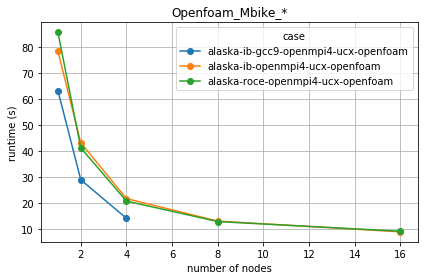

In [2]:
for test in ['Openfoam_Mbike_*']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    perf_var = 'Allrun_realtime'
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_nodes', perf_var)
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('runtime (s)')
    ax.set_title(test)
    plt.tight_layout()
    print()
    print('%s: %s' % (test, perf_var))
    display(HTML(table.to_html()))
